In [ ]:
''' 1. Write a Python function to calculate the revenue generated per city from a dataset of hotel bookings stored
    in a CSV file. Each row contains columns: city, room_price, and number_of_nights.
2. Write a Python program to find the city with the highest growth in bookings month-over-month using a dataset
   with columns: city, booking_date, and number_of_bookings.
3. Create a Python script to calculate the percentage of cancellations for each property from a dataset containing
   columns: property_id, booking_status (confirmed/cancelled).
4. Write a Python function to identify properties with unusually high cancellation rates using the Z-score method
   on the cancellation percentage.
5. Write a Python program to plot a bar chart showing the top 5 cities by total revenue using Matplotlib or Seaborn. '''


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfb = pd.read_csv('booking_growth.csv')
dfc = pd.read_csv('cancellations.csv')
dfh = pd.read_csv('hotel_bookings.csv')


In [5]:
dfh

,city,room_price,number_of_nights
0,Houston,147,3
1,Miami,247,7
2,Chicago,444,2
3,Miami,289,2
4,Miami,193,7
...,...,...,...
195,Chicago,69,3
196,Chicago,370,9
197,New York,313,1
198,Miami,449,9


In [8]:
# Answer 1
dfh['revenue'] = dfh['room_price'] * dfh['number_of_nights']
dfh

,city,room_price,number_of_nights,revenue
0,Houston,147,3,441
1,Miami,247,7,1729
2,Chicago,444,2,888
3,Miami,289,2,578
4,Miami,193,7,1351
...,...,...,...,...
195,Chicago,69,3,207
196,Chicago,370,9,3330
197,New York,313,1,313
198,Miami,449,9,4041


In [9]:
revenue_city = dfh.groupby('city')['revenue'].sum()
revenue_city

,revenue
city,
Chicago,51467
Houston,62625
Los Angeles,43513
Miami,53663
New York,56076


/tmp/ipython-input-935518138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cities_revenue.index, y=top_5_cities_revenue.values, palette='viridis')


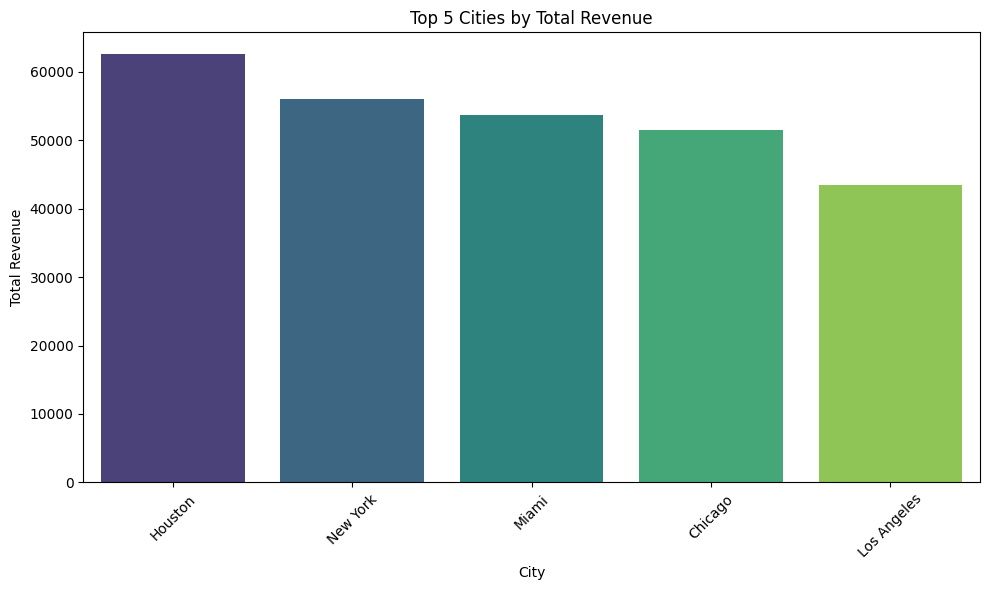

In [29]:
# Answer 5
top_5_cities_revenue = revenue_city.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_cities_revenue.index, y=top_5_cities_revenue.values, palette='viridis')
plt.title('Top 5 Cities by Total Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
dfb

,city,booking_date,number_of_bookings
0,New York,2024-02-24,17
1,Miami,2024-12-24,44
2,Los Angeles,2024-05-10,28
3,Houston,2024-10-14,29
4,Miami,2024-09-22,21
...,...,...,...
495,Los Angeles,2024-06-23,10
496,Chicago,2024-03-24,39
497,Houston,2024-01-22,13
498,New York,2024-01-27,31


In [12]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                500 non-null    object        
 1   booking_date        500 non-null    datetime64[ns]
 2   number_of_bookings  500 non-null    int64         
 3   month               500 non-null    period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 15.8+ KB


In [11]:
# Answer 2
dfb['month'] = dfb['booking_date'].dt.to_period('M')

monthly_bookings = dfb.groupby(['city', 'month'])['number_of_bookings'].sum().reset_index()
monthly_bookings = monthly_bookings.sort_values(by=['city', 'month'])

monthly_bookings['prev_month_bookings'] = monthly_bookings.groupby('city')['number_of_bookings'].shift(1)
monthly_bookings['growth'] = monthly_bookings['number_of_bookings'] - monthly_bookings['prev_month_bookings']

city_highest_growth = monthly_bookings.loc[monthly_bookings['growth'].idxmax()]

print("City with the highest month-over-month growth in bookings:")
display(city_highest_growth)

City with the highest month-over-month growth in bookings:


,17
city,Houston
month,2024-06
number_of_bookings,328
prev_month_bookings,101.0
growth,227.0


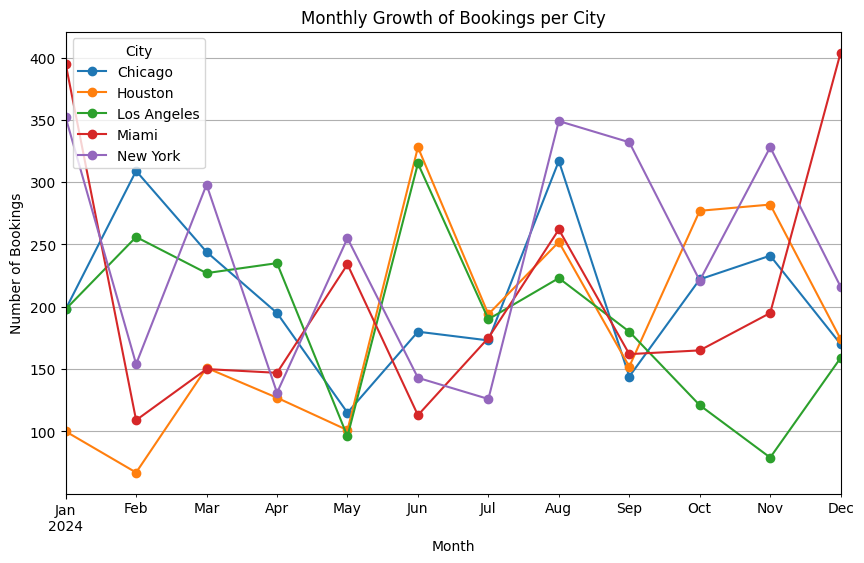

In [18]:
pivot_df = monthly_bookings.pivot(index="month", columns="city", values="number_of_bookings")

pivot_df.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Monthly Growth of Bookings per City")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.legend(title="City")
plt.grid(True)
plt.show()

In [4]:
dfc

,property_id,booking_status
0,P17,confirmed
1,P10,confirmed
2,P10,cancelled
3,P4,confirmed
4,P20,cancelled
...,...,...
295,P17,confirmed
296,P9,cancelled
297,P9,cancelled
298,P1,cancelled


In [28]:
# Answer 3
percentage_cancellations = dfc.groupby('property_id')['booking_status'].apply(lambda x: (x == 'cancelled').mean() * 100)
percentage_cancellations.name = 'cancellation_percentage'
percentage_cancellations

,cancellation_percentage
property_id,
P1,57.142857
P10,26.315789
P11,42.857143
P12,33.333333
P13,31.250000
P14,23.076923
P15,18.181818
P16,16.666667
P17,28.571429


In [25]:
# Answer 4
from scipy.stats import zscore

def identify_high_cancellation_properties(cancellation_percentages, threshold=2):
  z_scores = zscore(cancellation_percentages)
  outliers = cancellation_percentages[abs(z_scores) > threshold]
  return outliers

high_cancellation_properties = identify_high_cancellation_properties(percentage_cancellations, threshold=2)

print("Properties with unusually high cancellation rates:")
display(high_cancellation_properties)

Properties with unusually high cancellation rates:


,booking_status
property_id,
P1,57.142857
